In [2]:
import csv
filename = './temp_ac_cache5.md'
data = []
with open(filename) as f:
    reader = csv.reader(f, delimiter='\t')
    data.append([x for x in reader])
data = data[0]


In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

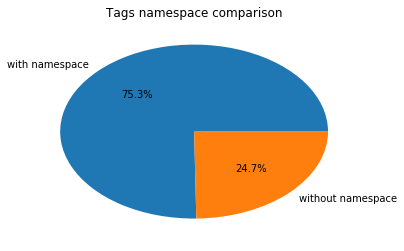

In [15]:
labels = 'with namespace', 'without namespace'
sizes = [
    sum([int(x[0]) for x in filter(lambda x: x[1], data)]),
    sum([int(x[0]) for x in filter(lambda x: not x[1], data)]),
]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.set_title('Tags namespace comparison')
plt.show()

In [14]:
from ipywidgets import interact
max_item = 7
nm_tags = list(filter(lambda x: x[1], data))
labels = set([x[1] for x in nm_tags])
#
sizes = {}
for tag_data in nm_tags:
    for label in labels:
        if tag_data[1] == label:
            sizes.setdefault(label, 0)
            sizes[label] += int(tag_data[0])
#
xt_counts = {}
for tag_data in nm_tags:
    for label in labels:
        if tag_data[1] == label:
            xt_counts.setdefault(label, 0)
            xt_counts[label] += 1
#
nm_data = sizes
sizes = []
labels = []
sorted_nm_data = sorted(nm_data.items(), key=lambda kv:kv[1], reverse=True)
for key, value in sorted_nm_data:
    sizes.append(value)
    labels.append(key)
#
sizes_ax2 = []
labels_ax2 = []
sorted_xt_counts = sorted(xt_counts.items(), key=lambda kv:kv[1], reverse=True)
for key, value in sorted_xt_counts:
    sizes_ax2.append(value)
    labels_ax2.append(key)

    
# print(sorted_nm_data)
def plt_pie(f):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes[:f-1]+[sum(sizes[f-1:])], labels=labels[:f-1]+['others'], autopct='%1.1f%%')
    ax1.set_title('Tags with namespace by image count')
    _, ax2 = plt.subplots()
    ax2.pie(sizes_ax2[:f-1]+[sum(sizes_ax2[f-1:])], labels=labels_ax2[:f-1]+['others'], autopct='%1.1f%%')
    ax2.set_title('Tags with namespace by entry count')
    plt.show()
    
    
interact(plt_pie, f=(2,12))

interactive(children=(IntSlider(value=7, description='f', max=12, min=2), Output()), _dom_classes=('widget-interact',))

<function __main__.plt_pie>